In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Our Dataset
df = pd.read_excel('data/msft_post_linkdin.xlsx').dropna()

# Our Target Variable (Which will be predicted)
target = df.Change_tmr_direction


# Our Feature Variables (Which will be used to predict the target)
explanatory = df.drop(columns=['Change_tmr_direction', 'pct_Change_tmr', 'Date'])

In [53]:
model_dt = DecisionTreeClassifier(max_depth=30)

model_dt.fit(X=explanatory,  y=target)

DecisionTreeClassifier(max_depth=30)

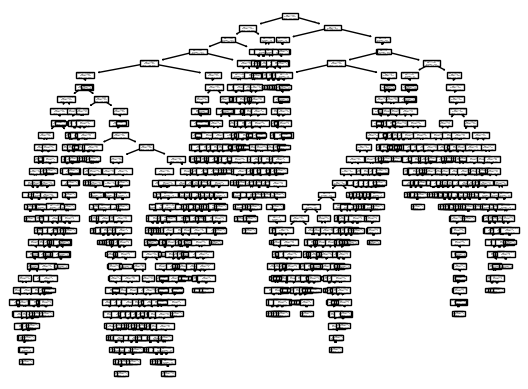

In [54]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

In [55]:
# Predictions
y_pred = model_dt.predict(X=explanatory)

In [56]:
# Creating Another Dataset, Including the
#  Predictions and the Actual values
df_predictions = df[['Change_tmr_direction']]
df_predictions['prediction'] = y_pred
df_predictions


C:\Users\ehdae\AppData\Local\Temp\ipykernel_38180\4091512211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['prediction'] = y_pred


,Change_tmr_direction,prediction
0,UP,UP
1,UP,UP
2,UP,UP
3,DOWN,DOWN
4,DOWN,DOWN
...,...,...
1933,UP,UP
1934,UP,UP
1935,DOWN,DOWN
1936,DOWN,DOWN


In [57]:
#How many we got the same
sames = df_predictions.Change_tmr_direction == df_predictions.prediction
sames.sum() /  len(sames)


np.float64(0.9979360165118679)